## Observations and Insights 

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study = pd.merge(mouse_metadata, study_results, how="outer", on= "Mouse ID")
# Display the data table for preview
combined_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_count = combined_study["Mouse ID"].count()
mice_count

mice_count_unique = combined_study["Mouse ID"].nunique()
mice_count_unique

print(f"The dataset has {mice_count} total IDs, with {mice_count_unique} unique mice IDs")

The dataset has 1893 total IDs, with 249 unique mice IDs


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_study.set_index("Mouse ID")
has_duplicate = combined_study.duplicated(subset = ['Mouse ID','Timepoint'], keep= False)

duplicateed_mouse = combined_study[has_duplicate]['Mouse ID'].unique()
duplicateed_mouse

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates = combined_study[has_duplicate]
duplicates.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_study = combined_study.drop(combined_study[(combined_study['Mouse ID']=='g989')].index, inplace =False)
clean_combined_study


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_count=clean_combined_study["Mouse ID"].count()
clean_count

clean_count_unique = clean_combined_study["Mouse ID"].nunique()
clean_count_unique

print(f"There are total of {clean_count} mice in the dataset with {clean_count_unique} unique mice IDs")

drug_regimen = clean_combined_study["Drug Regimen"].value_counts()
drug_regimen


There are total of 1880 mice in the dataset with 248 unique mice IDs


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_group_df = clean_combined_study.groupby(['Drug Regimen'])

regimen_count_df = regimen_group_df['Drug Regimen'].count()
mean_regimen = regimen_group_df['Tumor Volume (mm3)'].mean()
median_regimen = regimen_group_df['Tumor Volume (mm3)'].median()
var_regimen = regimen_group_df['Tumor Volume (mm3)'].var(ddof = 0)
std_regimen = regimen_group_df['Tumor Volume (mm3)'].std(ddof = 0)
sem_regimen = regimen_group_df['Tumor Volume (mm3)'].sem(ddof = 0)


summary_stats = pd.DataFrame({'Mean':mean_regimen, 'Median':median_regimen, 'Variance': var_regimen,
                            'Standard Deviation': std_regimen, 'SEM': sem_regimen
                            })

summary_stats



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.320930,50.446266,43.555716,6.599675,0.542490
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = regimen_group_df.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
summary_statistics_agg



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

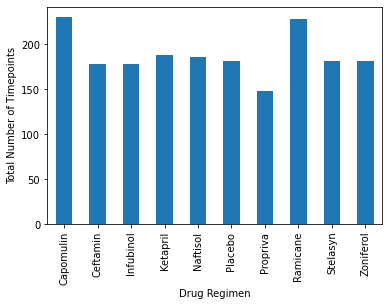

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_count = regimen_group_df["Timepoint"].count()

timepoints_chart = timepoints_count.plot(kind='bar', y = 'Total Number of Timepoints')
timepoints_chart.set_xlabel("Drug Regimen")
timepoints_chart.set_ylabel("Total Number of Timepoints")


plt.show()
plt.tight_layout()


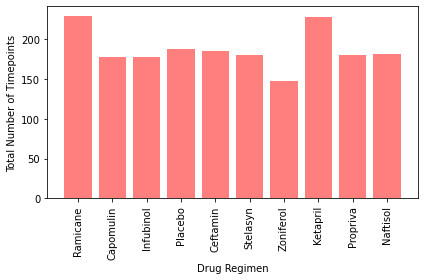

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(regimen_group_df))
drug = combined_study["Drug Regimen"].unique()
tick_locations = [value for value in x_axis]
plt.bar(x_axis, timepoints_count, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, drug, rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.tight_layout()
plt.show()


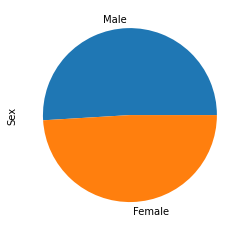

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_combined_study["Sex"].value_counts()
gender_distribution.plot(kind = 'pie')
plt.show()


([<matplotlib.patches.Wedge at 0x22e08ed1d68>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

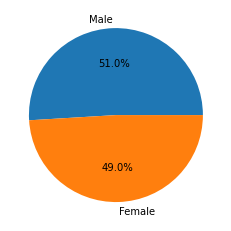

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_combined_study["Sex"].unique()
plt.pie(clean_combined_study["Sex"].value_counts(),labels = labels ,autopct="%1.1f%%", shadow=False, startangle=0)


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimen = clean_combined_study.loc[(clean_combined_study['Drug Regimen']=='Capomulin') | (clean_combined_study['Drug Regimen'] == 'Ramicane') |
                                        (clean_combined_study['Drug Regimen']=='Infubinol') |  (clean_combined_study['Drug Regimen']=='Ceftamin')]
# Start by getting the last (greatest) timepoint for each mouse
four_regimen_max = four_regimen.groupby(["Mouse ID"]).max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_regimen_max_df = pd.merge(four_regimen_max, clean_combined_study, on=("Mouse ID","Timepoint"),how="left" )
four_regimen_max_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
for drug in drugs:
    quartiles = four_regimen_max_df.loc[four_regimen_max_df['Drug Regimen'] == drug, ['Mouse ID', 'Tumor Volume (mm3)']]['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers for treatment {drug}.")
    print(f"Values above {upper_bound} could be outliers for treatment {drug}.")
    outlier_occupancy = four_regimen_max_df.loc[(four_regimen_max_df['Drug Regimen'] == drug) & ((four_regimen_max_df['Tumor Volume (mm3)'] < lower_bound) | (four_regimen_max_df['Tumor Volume (mm3)'] > upper_bound))]
    print(outlier_occupancy)
    print('-'*45)
    

    

Values below 20.70456164999999 could be outliers for treatment Capomulin.
Values above 51.83201549 could be outliers for treatment Capomulin.
Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []
---------------------------------------------
Values below 17.912664470000003 could be outliers for treatment Ramicane.
Values above 54.30681135 could be outliers for treatment Ramicane.
Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []
---------------------------------------------
Values below 36.83290494999999 could be outliers for treatment Infubinol.
Values above 82.74144559000001 could be outliers for treatment Infubinol.
   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
15     c326          5    Infubinol  Female          18          25   

    Tumor Volume (mm3)  Metastatic Sites  
15           36

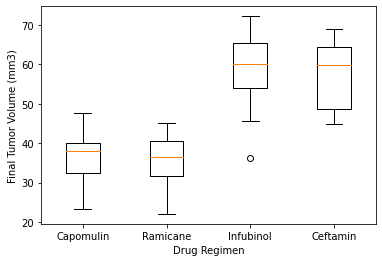

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin_tumors = four_regimen_max_df.loc[four_regimen_max_df['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Tumor Volume (mm3)']]['Tumor Volume (mm3)']
Ramicane_tumors = four_regimen_max_df.loc[four_regimen_max_df['Drug Regimen'] == 'Ramicane', ['Mouse ID', 'Tumor Volume (mm3)']]['Tumor Volume (mm3)']
Infubinol_tumors = four_regimen_max_df.loc[four_regimen_max_df['Drug Regimen'] == 'Infubinol', ['Mouse ID', 'Tumor Volume (mm3)']]['Tumor Volume (mm3)']
Ceftamin_tumors =  four_regimen_max_df.loc[four_regimen_max_df['Drug Regimen'] == 'Ceftamin', ['Mouse ID', 'Tumor Volume (mm3)']]['Tumor Volume (mm3)']

data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=drugs, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

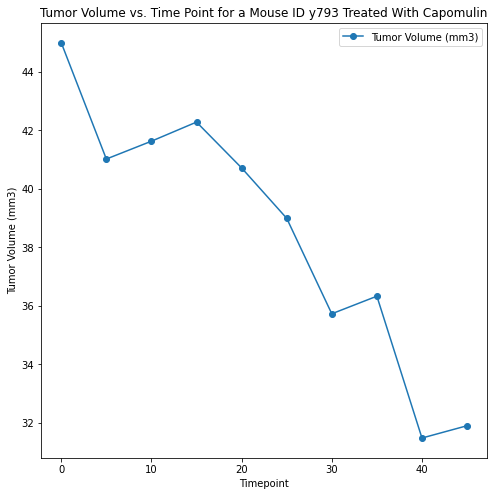

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = 'y793'
drug_regimen = 'Capomulin'
mouse_id_data = clean_combined_study.loc[(clean_combined_study['Mouse ID'] == mouse_id) & (clean_combined_study['Drug Regimen'] == drug_regimen), ['Tumor Volume (mm3)', 'Timepoint']]

mouse_id_data.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", marker = "o", figsize=(8,8),
              title="Tumor Volume vs. Time Point for a Mouse ID y793 Treated With Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

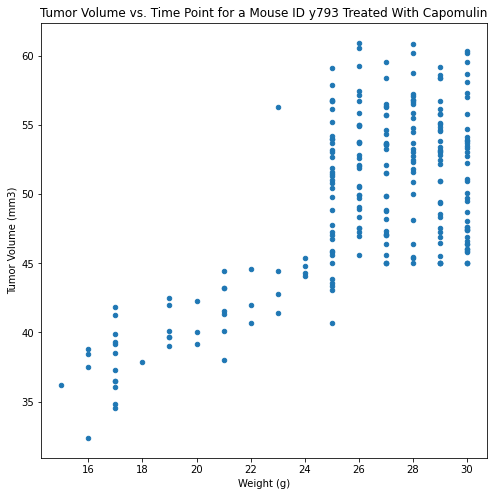

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter= clean_combined_study.groupby(['Mouse ID']).mean()[['Tumor Volume (mm3)', 'Weight (g)']]

# campolin_scatter= clean_combined_study.groupby(['Mouse ID']).loc[clean_combined_study.groupby(['Mouse ID'])['Drug Regimen'] == 'Capomulin', ['Tumor Volume (mm3)', 'Weight (g)' ] ]
# campolin_scatter


capomulin_scatter.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", marker = "o", figsize=(8,8), title="Tumor Volume vs. Time Point for a Mouse ID y793 Treated With Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

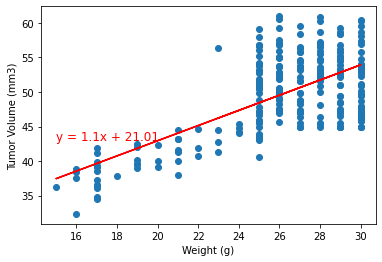

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_axis = capomulin_scatter['Weight (g)']
y_axis = capomulin_scatter['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(15,43),fontsize=12,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()